In [1]:
import pandas as pd
import numpy as np
import io
import matplotlib.pyplot as plt

In [2]:
drivers = pd.read_csv('drivers.csv', encoding='latin-1')

In [3]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [4]:
df = pd.read_csv('results.csv', encoding='latin-1')
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
constructors = pd.read_csv('constructors.csv')
constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [6]:
constructor_results = pd.read_csv('constructor_results.csv', encoding='latin-1')
constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [7]:
constructor_standings = pd.read_csv('constructor_standings.csv', encoding='latin-1')
constructor_standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


### Add win column

In [8]:
win = []
for position in df['position']:
    if position == str(1):
        win.append(1)
    else:
        win.append(0)
print(len(win))
df.shape

24620


(24620, 18)

In [9]:
df['win'] = win
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,win
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,0
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,0
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,0
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,0


### Top drivers in history

In [10]:
n_wins = df.loc[df['position'] == str(1)]
n_wins_driver = n_wins.groupby('driverId')['driverId'].count()
n_wins_driver.head()

driverId
1    84
3    23
4    32
5     1
8    21
Name: driverId, dtype: int64

In [11]:
n_wins_top_10 = n_wins_driver.nlargest(10)
n_wins_top_10.head()

driverId
30     91
1      84
20     53
117    51
102    41
Name: driverId, dtype: int64

In [12]:
names = []
for Id in n_wins_top_10.index:
    names.append(drivers.loc[drivers['driverId'] == Id, 'surname'].values[0])
print(names)

['Schumacher', 'Hamilton', 'Vettel', 'Prost', 'Senna', 'Alonso', 'Mansell', 'Stewart', 'Lauda', 'Clark']


<BarContainer object of 10 artists>

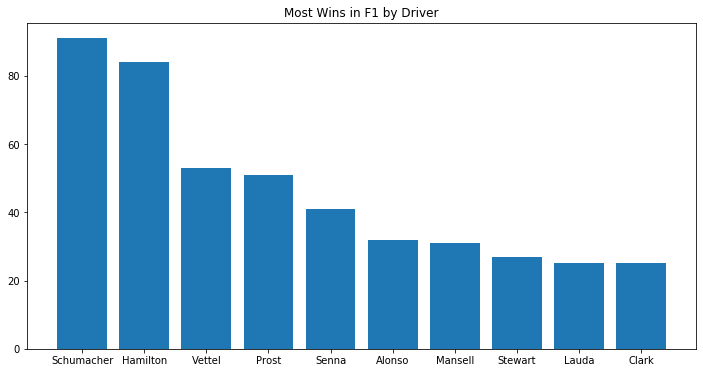

In [13]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Driver')
plt.bar(names, n_wins_top_10)

### Top constructors in history

In [14]:
n_wins_constructor = n_wins.groupby('constructorId')['constructorId'].count()
n_wins_constructor.head()

constructorId
1    178
2      1
3    114
4     35
5      1
Name: constructorId, dtype: int64

In [15]:
n_wins_top_10c = n_wins_constructor.nlargest(10)
n_wins_top_10c.head()

constructorId
6      239
1      178
3      114
131    102
9       62
Name: constructorId, dtype: int64

In [16]:
names_c = []
for Id in n_wins_top_10c.index:
  names_c.append(constructors.loc[constructors['constructorId'] == Id, 'name'].values[0])
print(names_c)

['Ferrari', 'McLaren', 'Williams', 'Mercedes', 'Red Bull', 'Team Lotus', 'Renault', 'Benetton', 'Tyrrell', 'Brabham']


<BarContainer object of 10 artists>

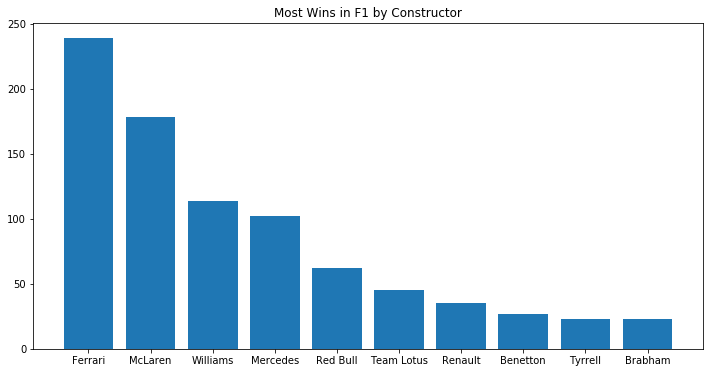

In [17]:
plt.rcParams["figure.figsize"] = (12,6)
plt.title('Most Wins in F1 by Constructor')
plt.bar(names_c, n_wins_top_10c)

### Label: time from first position

In [18]:
races = pd.read_csv('races.csv', encoding='latin-1')

In [19]:
year=[]
for raceId in df['raceId']:
    year.append(races.loc[races['raceId'] == raceId, 'year'].values[0])

In [20]:
df['year'] = year
df['year'].unique()

array([2008, 2007, 2006, 2005, 2004, 2003, 2002, 2001, 2000, 1999, 1998,
       1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990, 2009, 1989, 1988,
       1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980, 1979, 1978, 1977,
       1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969, 1968, 1967, 1966,
       1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958, 1957, 1956, 1955,
       1954, 1953, 1952, 1951, 1950, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019])

In [21]:
time_from_first = []
current_time = 0

for index, row in df.iterrows():
    if row['milliseconds'] == '\\N':
        time_from_first.append(1000000)
    elif int(row['positionOrder']) == 1:
        time_from_first.append(0)
        current_time = int(row['milliseconds'])
    else:
        time_from_first.append(int(row['milliseconds']) - current_time)
  

In [22]:
df['Time_From_First'] = time_from_first

In [23]:
finished = []

### Bind race IDs with circuits

In [24]:
group = races.groupby('name')
group.head()
races_u = group.apply(lambda x: x['raceId'].unique())
races_u.head()

name
Abu Dhabi Grand Prix     [17, 355, 858, 877, 897, 918, 945, 968, 988, 1...
Argentine Grand Prix     [193, 209, 226, 241, 485, 498, 512, 527, 543, ...
Australian Grand Prix    [1, 18, 36, 55, 71, 90, 108, 124, 141, 158, 17...
Austrian Grand Prix      [113, 129, 146, 167, 183, 200, 220, 397, 415, ...
Azerbaijan Grand Prix                               [976, 992, 1013, 1038]
dtype: object

In [25]:
laps = pd.read_csv('lap_times.csv', encoding='latin-1')

In [26]:
races_df_u = pd.DataFrame(races_u)
races_df_u.head(10)

,0
name,
Abu Dhabi Grand Prix,"[17, 355, 858, 877, 897, 918, 945, 968, 988, 1..."
Argentine Grand Prix,"[193, 209, 226, 241, 485, 498, 512, 527, 543, ..."
Australian Grand Prix,"[1, 18, 36, 55, 71, 90, 108, 124, 141, 158, 17..."
Austrian Grand Prix,"[113, 129, 146, 167, 183, 200, 220, 397, 415, ..."
Azerbaijan Grand Prix,"[976, 992, 1013, 1038]"
Bahrain Grand Prix,"[4, 20, 38, 53, 73, 92, 337, 863, 883, 902, 92..."
Belgian Grand Prix,"[12, 30, 49, 86, 103, 137, 154, 170, 186, 203,..."
Brazilian Grand Prix,"[16, 35, 52, 70, 87, 107, 110, 126, 143, 159, ..."
British Grand Prix,"[8, 26, 44, 60, 81, 100, 118, 133, 151, 161, 1..."


### Add circuitIds to main dataframe

In [27]:
circuitId = []
for index, row in df.iterrows():
    ID = races.loc[races['raceId'] == row['raceId'], 'circuitId'].values[0]
    circuitId.append(ID)

In [28]:
df['circuitId'] = circuitId

In [29]:
df.tail()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,win,year,Time_From_First,circuitId
24615,24621,1030,841,51,99,16,16,16,16,0.0,...,\N,28,15,1:43.256,193.639,11,0,2019,1000000,24
24616,24622,1030,847,3,63,18,17,17,17,0.0,...,\N,50,13,1:43.074,193.981,11,0,2019,1000000,24
24617,24623,1030,842,5,10,11,18,18,18,0.0,...,\N,53,10,1:42.414,195.231,12,0,2019,1000000,24
24618,24624,1030,9,3,88,19,19,19,19,0.0,...,\N,51,20,1:44.500,191.333,12,0,2019,1000000,24
24619,24625,1030,840,211,18,12,\N,R,20,0.0,...,\N,25,17,1:43.326,193.507,23,0,2019,1000000,24


In [30]:
def raceID_location(raceId):
    for index, row in  races_df_u.iterrows():
        if raceId in row[0]:
              return row[0]
    return -1

In [31]:
print(raceID_location(17))

[  17  355  858  877  897  918  945  968  988 1009 1030 1052]


### Add year to laps dataframe

In [32]:
year_lap=[]
for raceId in laps['raceId']:
    year_lap.append(races.loc[races['raceId'] == raceId, 'year'].values[0])

In [33]:
laps['year'] = year_lap

In [34]:
print(laps['year'].unique())

[2011 2012 2013 2014 2015 2016 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2017 2018 2019]


### Average lap for all occurences at respective circuit

In [35]:
average_lap = []
previous = 0
location = []
count = 0
for index, row in df.iterrows():
    laps_list = laps.loc[(laps['raceId'] == row['raceId']) & (laps['driverId'] == row['driverId']), 'milliseconds']
    average_lap.append(laps_list.mean())

In [36]:
df['average_lap'] = average_lap
df.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,win,year,Time_From_First,circuitId,average_lap
0,1,18,1,1,22,1,1,1,1,10.0,...,39,2,1:27.452,218.300,1,1,2008,0,1,98114.068966
1,2,18,2,2,3,5,2,2,2,8.0,...,41,3,1:27.739,217.586,1,0,2008,5478,1,98208.517241
2,3,18,3,3,7,7,3,3,3,6.0,...,41,5,1:28.090,216.719,1,0,2008,8163,1,98254.810345
3,4,18,4,4,5,11,4,4,4,5.0,...,58,7,1:28.603,215.464,1,0,2008,17181,1,98410.293103
4,5,18,5,1,23,3,5,5,5,4.0,...,43,1,1:27.418,218.385,1,0,2008,18014,1,98424.655172


In [37]:
df.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
win                  int64
year                 int64
Time_From_First      int64
circuitId            int64
average_lap        float64
dtype: object

### Average lap for all occurences on circuit BEFORE respective race

In [ ]:

average_lap_list = []
for index,row in df.iterrows():
    print(row['resultId'])
    list_average = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'average_lap']
    average_lap_list.append(list_average.mean())
    count += 1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871


In [ ]:
df['average_lap'] = average_lap_list

In [ ]:
finished = []
for index, row in df.iterrows():
    if row['time'] == '\\N':
        finished.append(0)
    else:
        finished.append(1)

In [ ]:
df['finished'] = finished

### Percent of times race has been completed in the past by driver

In [ ]:

previous_finishes = []
count = 0
for index,row in df.iterrows():
    if (count % 100) == 0:
        print(count)
    count+=1
    list_finish = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'finished']
    previous_finishes.append(list_finish.mean())

In [ ]:
print(previous_finishes)

### number of times race has been won in the past by driver

In [ ]:

previous_wins = []

for index,row in df.iterrows():
    print(row['resultId'])
    list_wins = df.loc[(df['driverId'].apply(lambda x: x == row['driverId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])), 'positionOrder']
    num_wins = list_wins[list_wins == 1].value_counts()
    #previous_wins.append(num_wins)
    #print(num_wins)
    if len(num_wins.values) > 0:
        previous_wins.append(num_wins.values[0])
    else:
        previous_wins.append(0)

In [ ]:
print(previous_wins)

In [ ]:
previous_finishes_c = []
for index,row in df.iterrows():
    print(row['resultId'])
    back = row['year'] - 5
    list_finish_c = df.loc[(df['constructorId'].apply(lambda x: x == row['constructorId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])) & (df['year'].apply(lambda x: x > back)), 'finished']
    previous_finishes_c.append(list_finish_c.mean())

In [ ]:
print(previous_finishes_c)

In [ ]:
previous_wins_c = []

for index,row in df.iterrows():
    print(row['resultId'])
    list_wins_c = df.loc[(df['constructorId'].apply(lambda x: x == row['constructorId'])) & (df['circuitId'].apply(lambda x: x == row['circuitId'])) & (df['year'].apply(lambda x: x < row['year'])) & (df['year'].apply(lambda x: x > (row['year'] - 5))), 'positionOrder']
    num_wins_c = list_wins_c[list_wins_c == 1].value_counts()
    #previous_wins.append(num_wins)
    #print(num_wins)
    if len(num_wins_c.values) > 0:
        previous_wins_c.append(num_wins_c.values[0])
    else:
        previous_wins_c.append(0)

In [ ]:

racers_Ita = df.loc[df['raceId'].apply(lambda x: x in races_u['Italian Grand Prix'])]
racers_Ita = racers_Ita[['constructorId', 'year', 'average_lap', 'Time_From_First']]
racers_Ita.head()

In [ ]:
racers_Ita.dtypes